# Task 2: Credit Risk Prediction (Loan Default Prediction)

# Introduction

Credit risk prediction is a key problem in banking and financial services. Financial institutions must determine whether a loan applicant is likely to
repay or default on a loan.

Using the Loan Prediction Dataset (Kaggle), we will build a classification model to predict loan approval status (Loan_Status).

# Problem Statement

The objective is to:

Clean and preprocess the dataset

Handle missing values

Perform Exploratory Data Analysis (EDA)

Train a classification model (Logistic Regression / Decision Tree)

Evaluate performance using:

Accuracy

Confusion Matrix

Classification Report

Target Variable:

Loan_Status

Y → Loan Approved

N → Loan Rejected


# Dataset Understanding and Description

The Loan Prediction dataset typically contains the following features:

Feature	Description: 

Gender:                        Male/Female

Married:                        Marital Status

Dependents:                    Number of dependents

Education:                 	Graduate / Not Graduate

Self_Employed:               	Employment status

ApplicantIncome:              	Income of applicant

CoapplicantIncome:	            Income of co-applicant

LoanAmount:	                    Loan amount requested

Loan_Amount_Term:	            Loan duration

Credit_History:                1 = Good, 0 = Bad

Property_Area:	                Urban/Rural/Semiurban

Loan_Status (default):                 Target variable

# Import Libraries and Load Dataset

In [24]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (update path if needed)
df = pd.read_csv("Loan_default.csv")

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)
df.head()

Dataset Shape: (255347, 18)

Columns:
 Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# Data Cleaning and Preparation

In [25]:
# Check missing values

df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [26]:

# Handling Missing Data

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numerical missing values with median
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    df[col] =  df[col].fillna(df[col].median())

# Verify no missing values remain
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [27]:

# Encoding Categorical Variables

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [28]:

# Feature & Target Separation

X = df.drop("Default", axis=1)
y = df["Default"]

# Exploratory Data Analysis (EDA)

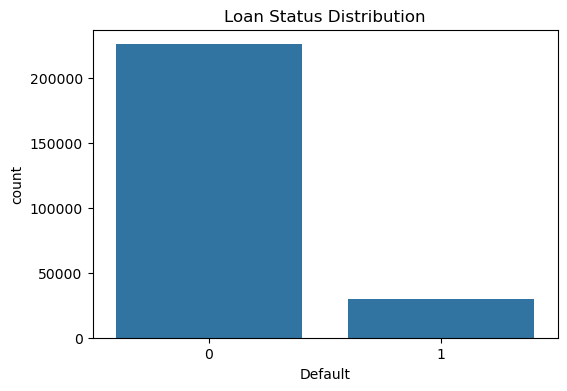

In [29]:
# Loan Status Distribution
    
plt.figure(figsize=(6,4))
sns.countplot(x='Default', data=df)
plt.title("Loan Status Distribution")
plt.show()

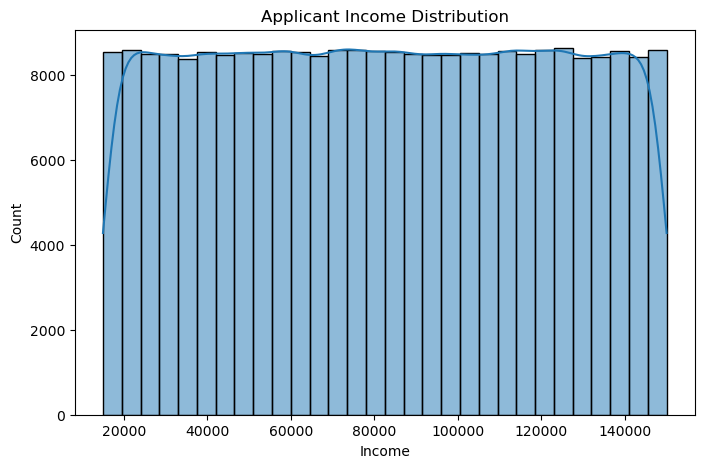

In [30]:
# Applicant Income Distribution

plt.figure(figsize=(8,5))
sns.histplot(df["Income"], bins=30, kde=True)
plt.title("Applicant Income Distribution")
plt.show()

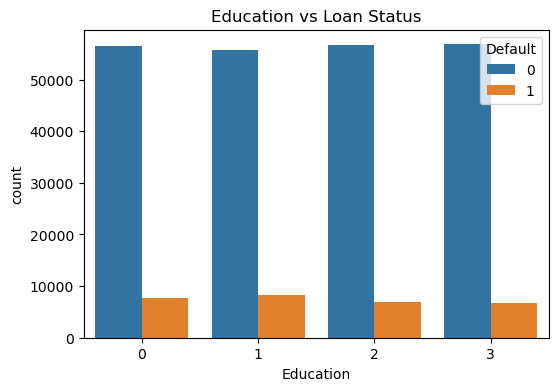

In [31]:
# Education vs Loan Status

plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Default', data=df)
plt.title("Education vs Loan Status")
plt.show()

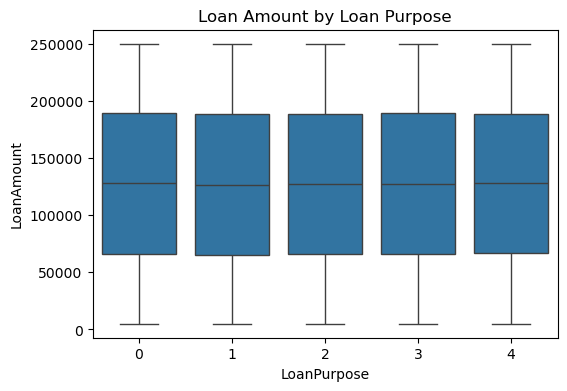

In [32]:
# Loan Amount by Loan Purpose

plt.figure(figsize=(6,4))
sns.boxplot(x='LoanPurpose', y='LoanAmount', data=df)
plt.title("Loan Amount by Loan Purpose")
plt.show()

# Model Training and Testing

In [33]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )

In [36]:
from sklearn.preprocessing import StandardScaler

# Scaling the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run the model on the SCALED data
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

#  Make predictions using the scaled test data
y_pred_log = log_model.predict(X_test_scaled)

In [37]:
# Decision Tree Model

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

# Evaluation Metrics

In [38]:
# Logistic Regression Evaluation

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))

print("\nConfusion Matrix:\n",
      confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8850205600156648

Confusion Matrix:
 [[67512   169]
 [ 8639   285]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.63      0.03      0.06      8924

    accuracy                           0.89     76605
   macro avg       0.76      0.51      0.50     76605
weighted avg       0.86      0.89      0.84     76605



In [39]:
# Decision Tree Evaluation

print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_tree))

print("\nConfusion Matrix:\n",
      confusion_matrix(y_test, y_pred_tree))

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.8012401279289864

Confusion Matrix:
 [[59227  8454]
 [ 6772  2152]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     67681
           1       0.20      0.24      0.22      8924

    accuracy                           0.80     76605
   macro avg       0.55      0.56      0.55     76605
weighted avg       0.82      0.80      0.81     76605



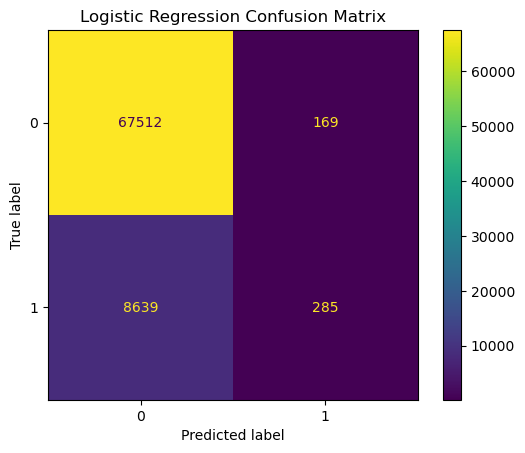

In [42]:
# Confusion Matrix Visualization 

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Conclusion – Key Insights

# Data Insights

Missing values were successfully handled.

Credit history is often a strong predictor.

Income distribution is skewed.

Class imbalance may exist.

# Model Insights

Logistic Regression provides stable baseline performance.

Decision Tree may capture nonlinear relationships.

Accuracy typically ranges between 75–85% depending on preprocessing.

Credit history strongly influences approval prediction.

# Business Insight

Banks can use this model to:

Reduce financial risk

Improve loan approval decisions

Automate applicant screening